In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
from ipdb import set_trace as mybreak
import pyicon as pyic
import cartopy.crs as ccrs
import glob
import pickle
import maps_icon_smt_temp as smt
import datetime
from matplotlib.patches import Rectangle
import xarray as xr
#import seawater as sw
import matplotlib.gridspec as gridspec

from icon_smt_levels import dzw, dzt, depthc, depthi

xarray
done xarray


In [2]:
run      = 'ngSMT_tke'
savefig  = False
path_fig = '../pics/'
nnf      = 0

gname = 'smt'
lev   = 'L128'

#path_data    = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/????-??/'
#fpath_tgrid = '/mnt/lustre01/work/mh0287/users/leonidas/icon/submeso/grid/cell_grid-OceanOnly_SubmesoNA_2500m_srtm30-icon.nc'
fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
fpath_Tri    = '/mnt/lustre01/work/mh0033/m300602/tmp/Tri.pkl'

path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree  = f'{path_grid}ckdtree/'
# fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res0.30_180W-180E_90S-90N.npz'
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'

fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
f = Dataset(fpath_tgrid, 'r')
clon = f.variables['clon'][:] * 180./np.pi # center longitude
clat = f.variables['clat'][:] * 180./np.pi # center latitude
f.close()

In [3]:
lon_reg = [-75, -55]
lat_reg = [33, 43]
lon_regm = [-65, -64]
lat_regm = [39.4, 40.2]
lon_regs = [-64.8, -64.6]
lat_regs = [39.6, 39.8]

In [4]:
lon0, lat0 = -64.5, 40
#lon0, lat0 = -64.15, 39.61
#lon0, lat0 = -75, 38
ic = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 
print(ic); print(clon[ic]); print(clat[ic])

13077912
-64.50211973100524
40.00032157769149


In [5]:
lon0, lat0 = -75, 34
ic1 = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 
lon0, lat0 = -70, 34
ic2 = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 
lon0, lat0 = -65, 34
ic3 = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 
lon0, lat0 = -60, 34
ic4 = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 
lon0, lat0 = -55, 34
ic5 = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 
lon0, lat0 = -75, 38
ic6 = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 
lon0, lat0 = -70, 38
ic7 = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 
lon0, lat0 = -65, 38
ic8 = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 
lon0, lat0 = -60, 38
ic9 = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 
lon0, lat0 = -55, 38
ic10 = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 

In [5]:
# load interpolated temperature and salinity
path_data    = '/work/mh0033/u241317/smt/results/pp_calc_T.nc'
dt = xr.open_dataset(path_data)
path_data    = '/work/mh0033/u241317/smt/results/pp_calc_S.nc'
ds = xr.open_dataset(path_data)
path_data    = '/work/mh0033/u241317/smt/N2/pp_calc_N2.nc'
dN = xr.open_dataset(path_data)

In [6]:
iz1 = 5
iz2 = 6
so1 = ds.isel(depthc=iz1).S
to1 = dt.isel(depthc=iz1).T
so2 = ds.isel(depthc=iz2).S
to2 = dt.isel(depthc=iz2).T

g     = 9.80665
rho0  = 1025.022
#rhop  = sw.dens(so[:], to[:], depthc[:])
rhop1 = sw.dens(so2, to2, depthc[iz2])
rhop2 = sw.dens(so1, to1, depthc[iz1])
#b     = - g * (rhop - rho0)/rho0
N2    = - g/rho0 * (rhop2 - rhop1) / (depthc[iz2]-depthc[iz1]) # dbdz
print('N2 max', N2.max(), 'N2 min', N2.min())

N2 max 0.019096754 N2 min -0.10112482


In [7]:
depthc[6]

21.5

In [71]:
A = N2
lon_reg_2 = lon_reg
lat_reg_2 = lat_reg
 

hca, hcb = pyic.arrange_axes(1, 2, plot_cb=True, asp=0.5, fig_size_fac=3)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_reg_2, lat_reg=lat_reg_2)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, rasterized=False, clim=(0, 1e-4))
ax.set_title('N2')

lon_reg_2 = lon_regm
lat_reg_2 = lat_regm

lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_reg_2, lat_reg=lat_reg_2)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, rasterized=False, clim=(0, 9e-5))
ax.set_title('N2')

toi.min() -0.08512645
toi.max() 0.0016182899
toi.min() 3.3479173e-05
toi.max() 0.00019737141


Text(0.5, 1.0, 'N2')

toi.min() -0.062436715
toi.max() 0.0017942502
toi.min() -0.000112310954
toi.max() 5.352775e-05


Text(0.5, 1.0, 'N2')

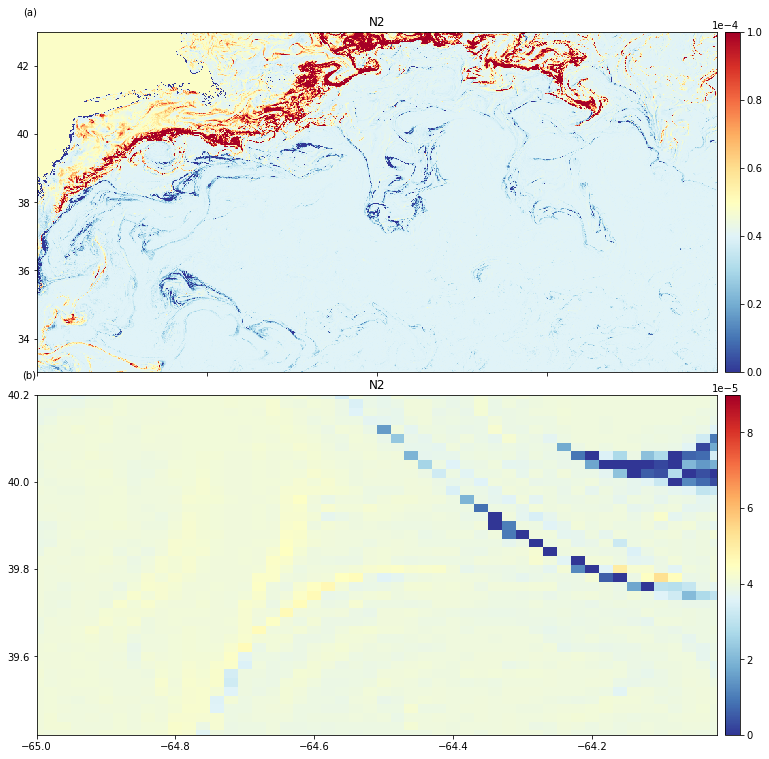

In [12]:
A = dN.isel(depthi=6).N2
lon_reg_2 = lon_reg
lat_reg_2 = lat_reg
 

hca, hcb = pyic.arrange_axes(1, 2, plot_cb=True, asp=0.5, fig_size_fac=3)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_reg_2, lat_reg=lat_reg_2)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, rasterized=False, clim=(0, 1e-4))
ax.set_title('N2')

lon_reg_2 = lon_regm
lat_reg_2 = lat_regm

lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_reg_2, lat_reg=lat_reg_2)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, rasterized=False, clim=(0, 9e-5))
ax.set_title('N2')

In [14]:
A.min()

<xarray.DataArray 'N2' ()>
array(-0.07080729, dtype=float32)
Coordinates:
    depthi   float32 20.0

In [16]:
path_data    = '/work/mh0033/u241317/smt/dudz/pp_calc_dudz.nc'
dU = xr.open_dataset(path_data)
dudz_squared = dU.dudz.isel(depthi=6).data

In [18]:
f=2*2*np.pi/86400*np.sin(clat[ic]*np.pi/180.)
#f = 1e-4
#Ri = (N2[:] * f**2) / (dudz**2 + dvdz**2)
Ri_ub = (A) / (dudz_squared + 1e-10)

toi.min() -388175.4
toi.max() 486615.9
toi.min() 0.6042508
toi.max() 1895.514


Text(0.5, 1.0, 'Ri_ub')

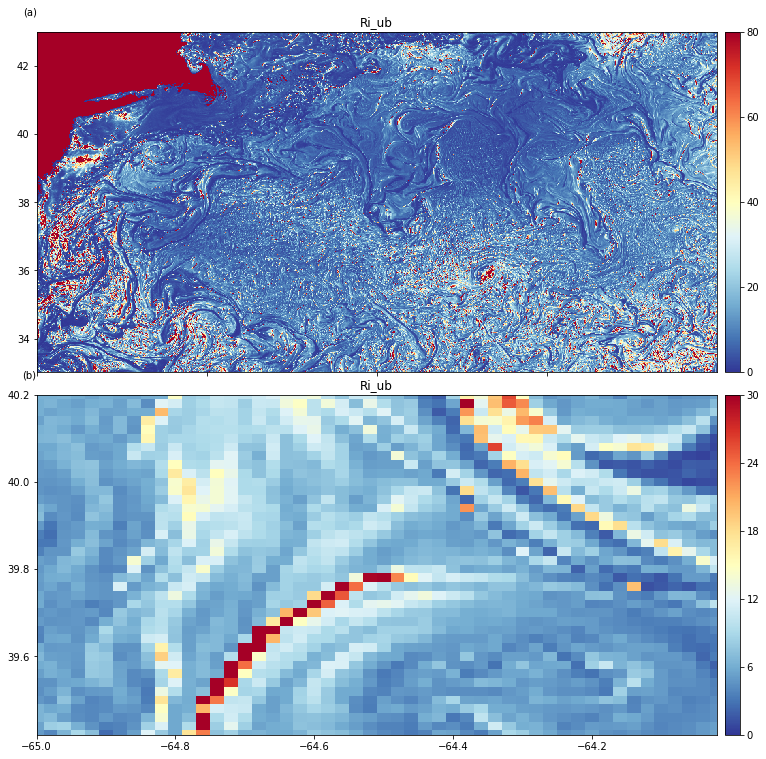

In [80]:
A = Ri_ub
lon_reg_2 = lon_reg
lat_reg_2 = lat_reg
 

hca, hcb = pyic.arrange_axes(1, 2, plot_cb=True, asp=0.5, fig_size_fac=3)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_reg_2, lat_reg=lat_reg_2)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, rasterized=False, clim=(0, 80))
ax.set_title('Ri_ub')

lon_reg_2 = lon_regm
lat_reg_2 = lat_regm

lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_reg_2, lat_reg=lat_reg_2)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, rasterized=False, clim=(0, 30))
ax.set_title('Ri_ub')

toi.min() -285385.5
toi.max() 486615.9
toi.min() -1.030068
toi.max() 2201.5605


Text(0.5, 1.0, 'Ri_ub')

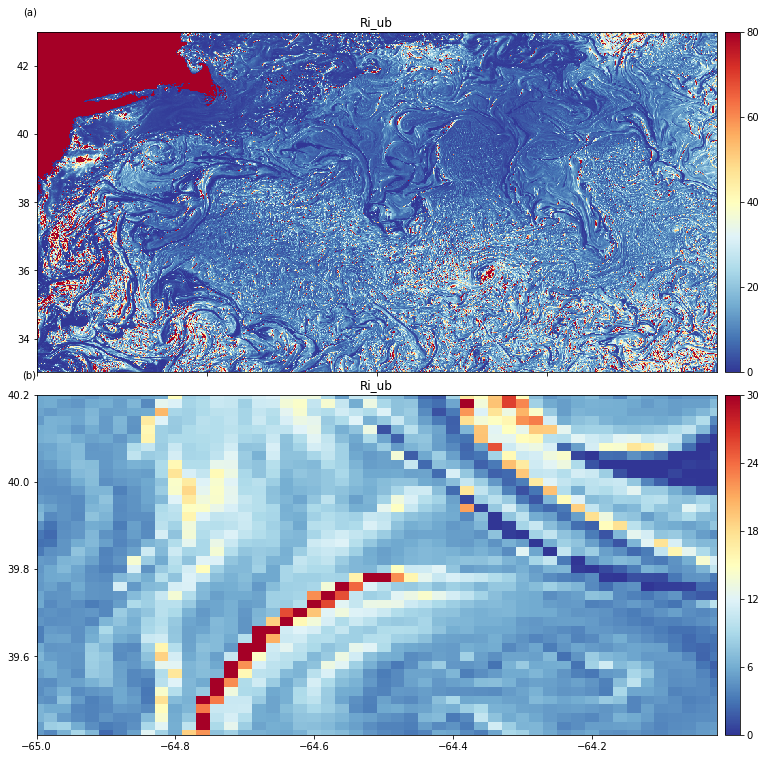

In [19]:
A = Ri_ub
lon_reg_2 = lon_reg
lat_reg_2 = lat_reg
 

hca, hcb = pyic.arrange_axes(1, 2, plot_cb=True, asp=0.5, fig_size_fac=3)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_reg_2, lat_reg=lat_reg_2)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, rasterized=False, clim=(0, 80))
ax.set_title('Ri_ub')

lon_reg_2 = lon_regm
lat_reg_2 = lat_regm

lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_reg_2, lat_reg=lat_reg_2)
print('toi.min()', toi.min()); print('toi.max()', toi.max())  
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, rasterized=False, clim=(0, 30))
ax.set_title('Ri_ub')

In [8]:
N2c = dN.isel(cc=ic).N2
N2c.shape

(113,)

In [31]:
path_data    = '/work/mh0033/u241317/smt/N2/pp_calc_N2i.nc'
dNi = xr.open_dataset(path_data)
N2i = dNi.isel(cc=ic).N2

In [34]:
path_data    = '/work/mh0033/u241317/smt/N2/pp_calc_N2g.nc'
dNg = xr.open_dataset(path_data)
N2g = dNg.isel(cc=ic).N2

In [31]:
# load interpolated temperature and salinity
path_data    = '/work/mh0033/u241317/smt/results/pp_calc_T.nc'
dt = xr.open_dataset(path_data)
#to = dt.T.isel(depthc=slice(1,5)).data
path_data    = '/work/mh0033/u241317/smt/results/pp_calc_S.nc'
ds = xr.open_dataset(path_data)

## old n2
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T

g     = 9.80665
rho0  = 1025.022
#rhop  = sw.dens(so[:], to[:], depthc[:])
rhop1 = sw.dens(so[1:], to[1:], depthc[1:])
rhop2 = sw.dens(so[:-1], to[:-1], depthc[:-1])
#b     = - g * (rhop - rho0)/rho0
N2    = - g/rho0 * (rhop2 - rhop1) / (depthc[1:]-depthc[:-1])#dzw[1:] # dbdz
print('N2 max', N2.max(), 'N2 min', N2.min())



N2 max 7.79695685407536e-05 N2 min -0.00044807143917881476


In [17]:
# load interpolated temperature and salinity
path_data    = '/work/mh0033/u241317/smt/T/pp_calc_T.nc'
dt = xr.open_dataset(path_data)
#to = dt.T.isel(depthc=slice(1,5)).data
path_data    = '/work/mh0033/u241317/smt/S/pp_calc_S.nc'
ds = xr.open_dataset(path_data)

## old n2
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T


g     = 9.80665
rho0  = 1025.022
#rhop  = sw.dens(so[:], to[:], depthc[:])
rhop1 = sw.dens(so[1:], to[1:], depthi[1:-1])
rhom1 = sw.dens(so[:-1], to[:-1], depthi[1:-1])
#b     = - g * (rhop - rho0)/rho0
N2o    = - g/rho0 * (rhom1 - rhop1) / dzt[1:-1]#dzw[1:] # dbdz
#print('N2 max', N2.max(), 'N2 min', N2.min())



In [32]:
# load interpolated temperature and salinity
path_data    = '/work/mh0033/u241317/smt/T/pp_calc_T.nc'
dt = xr.open_dataset(path_data)
#to = dt.T.isel(depthc=slice(1,5)).data
path_data    = '/work/mh0033/u241317/smt/S/pp_calc_S.nc'
ds = xr.open_dataset(path_data)

## old n2
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T

g     = 9.80665
rho0  = 1025.022
rhoc  = sw.dens(so[:], to[:], depthc[:])
rhoi1  = sw.dens(so[:], to[:], depthi[1:])
rhoi2  = sw.dens(so[:], to[:], depthi[:-1])
#rhop1c = sw.dens(so[1:], to[1:], depthc[1:])
#rhop1i = sw.dens(so[1:], to[1:], depthi[1:-1])
#rhom1 = sw.dens(so[:-1], to[:-1], depthc[:-1])
#rhoc  = rhop1c[:-1] + (rhop1c[:-1] - rhop1c[1:])*1/(depthc[2:]-depthc[1:-1]) * (depthi[2:-1] - depthc[1:-1])
bc     = - g * (rhoc - rho0)/rho0
bc_inter = bc[:-1] + (bc[:-1] - bc[1:])*interp_coef[:]
bi     = - g * (rhoi1 - rho0)/rho0
bi2     = - g * (rhoi2 - rho0)/rho0

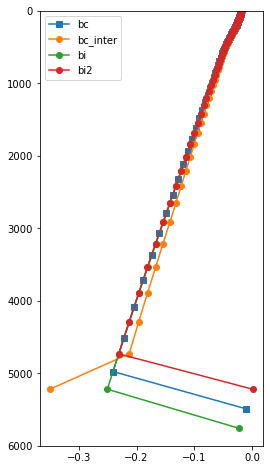

In [35]:
ylim = [6000,0]

fig, ax = plt.subplots(figsize=(4,8))
ax.plot(bc, depthc, label="bc", marker="s")
ax.plot(bc_inter[:], depthi[1:-1], marker="o", label="bc_inter")
ax.plot(bi[:], depthi[1:], marker="o", label="bi")
ax.plot(bi2[:], depthi[:-1], marker="o", label="bi2")
#ax.set_xlim([-2e-5,1e-4])
ax.set_ylim(ylim)
ax.legend()

In [6]:
import seawater as sw


In [8]:
interp_coef = 1/(depthc[1:]-depthc[:-1]) * (depthi[1:-1] - depthc[:-1])
interp_coef

array([0.625     , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.46153846, 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.46666667, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.47058824, 0.5       ,
       0.5       , 0.5       , 0.47368421, 0.5       , 0.47619048,
       0.47826087, 0.48      , 0.48148148, 0.48275862, 0.48387097,
       0.48484848, 0.45945946, 0.46511628, 0.46938776, 0.48148148,
       0.48275862, 0.49180328, 0.484375  , 0.49253731, 0.48571

In [31]:
bc_inter.shape

(111,)

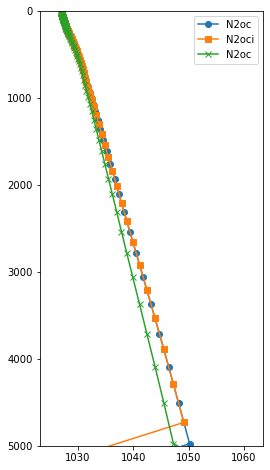

In [55]:
ylim = [5000,0]

fig, ax = plt.subplots(figsize=(4,8))
#ax.plot(N2c[1:-1], depthi[1:-1], marker="o", label="N2c")
#ax.plot(N2oc[:], depthi[1:-1], marker="o", label="N2oc")
#ax.plot(N2oci[:], depthi[1:-1], marker="s", label="N2oci")
ax.plot(rhop1c[:], depthc[1:], marker="o", label="N2oc")
ax.plot(rhop1i[:], depthi[1:-1], marker="s", label="N2oci")
ax.plot(rhoc[:], depthc[2:], marker="x", label="N2oc")
#ax.plot(N2g[1:-1], depthi[1:-1], marker="^", label="N2g")
#ax.plot(N2[:], depthi[1:-1], marker="x", label="N2_old")
#ax.plot(N2o[:], depthi[1:-1],  label="N2_o")
#ax.set_xlim([-2e-5,1e-4])
ax.set_ylim(ylim)
ax.legend()

In [24]:
ic=ic1
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T
rhop1 = sw.dens(so[1:], to[1:], depthi[1:-1])
rhom1 = sw.dens(so[:-1], to[:-1], depthi[1:-1])
N21    = - g/rho0 * (rhom1 - rhop1) / dzt[1:-1]
ic=ic2
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T
rhop1 = sw.dens(so[1:], to[1:], depthi[1:-1])
rhom1 = sw.dens(so[:-1], to[:-1], depthi[1:-1])
N22    = - g/rho0 * (rhom1 - rhop1) / dzt[1:-1]
ic=ic3
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T
rhop1 = sw.dens(so[1:], to[1:], depthi[1:-1])
rhom1 = sw.dens(so[:-1], to[:-1], depthi[1:-1])
N23    = - g/rho0 * (rhom1 - rhop1) / dzt[1:-1]
ic=ic4
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T
rhop1 = sw.dens(so[1:], to[1:], depthi[1:-1])
rhom1 = sw.dens(so[:-1], to[:-1], depthi[1:-1])
N24    = - g/rho0 * (rhom1 - rhop1) / dzt[1:-1]
ic=ic5
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T
rhop1 = sw.dens(so[1:], to[1:], depthi[1:-1])
rhom1 = sw.dens(so[:-1], to[:-1], depthi[1:-1])
N25    = - g/rho0 * (rhom1 - rhop1) / dzt[1:-1]

ic=ic6
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T
rhop1 = sw.dens(so[1:], to[1:], depthi[1:-1])
rhom1 = sw.dens(so[:-1], to[:-1], depthi[1:-1])
N26    = - g/rho0 * (rhom1 - rhop1) / dzt[1:-1]
ic=ic7
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T
rhop1 = sw.dens(so[1:], to[1:], depthi[1:-1])
rhom1 = sw.dens(so[:-1], to[:-1], depthi[1:-1])
N27    = - g/rho0 * (rhom1 - rhop1) / dzt[1:-1]
ic=ic8
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T
rhop1 = sw.dens(so[1:], to[1:], depthi[1:-1])
rhom1 = sw.dens(so[:-1], to[:-1], depthi[1:-1])
N28    = - g/rho0 * (rhom1 - rhop1) / dzt[1:-1]
ic=ic9
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T
rhop1 = sw.dens(so[1:], to[1:], depthi[1:-1])
rhom1 = sw.dens(so[:-1], to[:-1], depthi[1:-1])
N29    = - g/rho0 * (rhom1 - rhop1) / dzt[1:-1]
ic=ic10
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T
rhop1 = sw.dens(so[1:], to[1:], depthi[1:-1])
rhom1 = sw.dens(so[:-1], to[:-1], depthi[1:-1])
N210    = - g/rho0 * (rhom1 - rhop1) / dzt[1:-1]

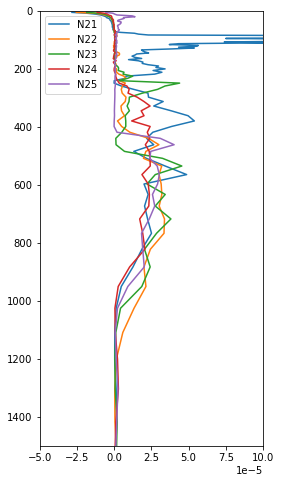

In [43]:
ylim = [1500,0]
fig, ax = plt.subplots(figsize=(4,8))
ax.plot(N21[:], depthi[1:-1],  label="N21")
ax.plot(N22[:], depthi[1:-1],  label="N22")
ax.plot(N23[:], depthi[1:-1],  label="N23")
ax.plot(N24[:], depthi[1:-1],  label="N24")
ax.plot(N25[:], depthi[1:-1],  label="N25")
ax.set_xlim([-5e-5,1e-4])
ax.set_ylim(ylim)
ax.legend()

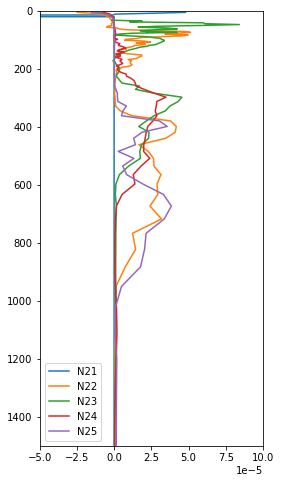

In [25]:
ylim = [1500,0]
fig, ax = plt.subplots(figsize=(4,8))
ax.plot(N26[:], depthi[1:-1],  label="N21")
ax.plot(N27[:], depthi[1:-1],  label="N22")
ax.plot(N28[:], depthi[1:-1],  label="N23")
ax.plot(N29[:], depthi[1:-1],  label="N24")
ax.plot(N210[:], depthi[1:-1],  label="N25")
ax.set_xlim([-5e-5,1e-4])
ax.set_ylim(ylim)
ax.legend()

In [11]:
dNi = dN

N21 = dNi.isel(cc=ic1).N2
N22 = dNi.isel(cc=ic2).N2
N23 = dNi.isel(cc=ic3).N2
N24 = dNi.isel(cc=ic4).N2
N25 = dNi.isel(cc=ic5).N2

N26 = dNi.isel(cc=ic6).N2
N27 = dNi.isel(cc=ic7).N2
N28 = dNi.isel(cc=ic8).N2
N29 = dNi.isel(cc=ic9).N2
N210 = dNi.isel(cc=ic10).N2

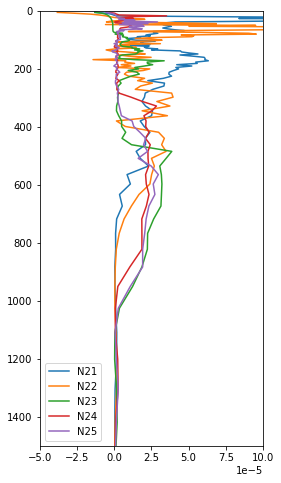

In [12]:
ylim = [1500,0]
fig, ax = plt.subplots(figsize=(4,8))
ax.plot(N21[1:-1], depthi[1:-1],  label="N21")
ax.plot(N22[1:-1], depthi[1:-1],  label="N22")
ax.plot(N23[1:-1], depthi[1:-1],  label="N23")
ax.plot(N24[1:-1], depthi[1:-1],  label="N24")
ax.plot(N25[1:-1], depthi[1:-1],  label="N25")
ax.set_xlim([-5e-5,1e-4])
ax.set_ylim(ylim)
ax.legend()

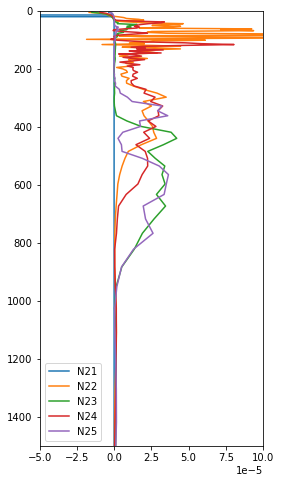

In [13]:
ylim = [1500,0]
fig, ax = plt.subplots(figsize=(4,8))
ax.plot(N26[1:-1], depthi[1:-1],  label="N21")
ax.plot(N27[1:-1], depthi[1:-1],  label="N22")
ax.plot(N28[1:-1], depthi[1:-1],  label="N23")
ax.plot(N29[1:-1], depthi[1:-1],  label="N24")
ax.plot(N210[1:-1], depthi[1:-1],  label="N25")
ax.set_xlim([-5e-5,1e-4])
ax.set_ylim(ylim)
ax.legend()

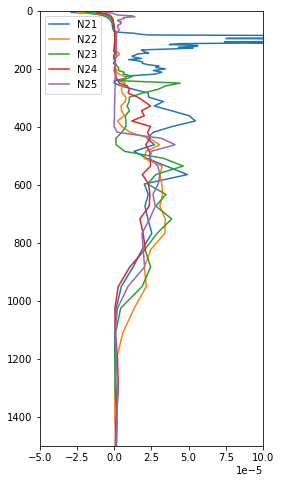

In [13]:
ylim = [1500,0]
fig, ax = plt.subplots(figsize=(4,8))
ax.plot(N21[1:-1], depthi[1:-1],  label="N21")
ax.plot(N22[1:-1], depthi[1:-1],  label="N22")
ax.plot(N23[1:-1], depthi[1:-1],  label="N23")
ax.plot(N24[1:-1], depthi[1:-1],  label="N24")
ax.plot(N25[1:-1], depthi[1:-1],  label="N25")
ax.set_xlim([-5e-5,1e-4])
ax.set_ylim(ylim)
ax.legend()

In [14]:
import gsw

In [15]:
import seawater as sw

In [7]:
import pandas as pd

In [68]:
# load interpolated temperature and salinity
path_data    = '/work/mh0033/u241317/smt/results/pp_calc_T.nc'
dt = xr.open_dataset(path_data)
#to = dt.T.isel(depthc=slice(1,5)).data
path_data    = '/work/mh0033/u241317/smt/results/pp_calc_S.nc'
ds = xr.open_dataset(path_data)

## old n2
so = ds.isel(cc=ic).S
to = dt.isel(cc=ic).T

rhop1 = sw.dens(so[1:], to[1:], depthi[1:-1])
rhom1 = sw.dens(so[:-1], to[:-1], depthi[1:-1])
N2o    = - g/rho0 * (rhom1 - rhop1) / dzt[1:-1]


In [40]:
dzt[0]


2.5

In [9]:
CT = gsw.CT_from_pt(so,to)
N2g= gsw.stability.Nsquared(so,CT,depthc,lat=None,axis=0)

In [56]:
S1 = ds.S.isel(depthc=10)

In [57]:
S1.shape

(59799625,)

In [20]:
CT.shape

(112,)

In [12]:
N2g[0].shape
g     = 9.80665
rho0  = 1025.022

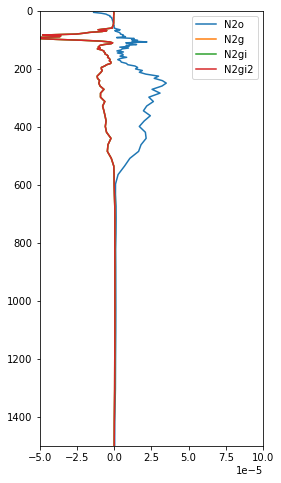

In [115]:
ylim = [1500,0]
fig, ax = plt.subplots(figsize=(4,8))
ax.plot(N2o[:], depthi[1:-1],  label="N2o")
ax.plot(N2g[1:-1], depthi[1:-1],  label="N2g")
ax.plot(N2gg[1:-1], depthi[1:-1],  label="N2gi")
ax.plot(N2gi2[1:-1], depthi[1:-1],  label="N2gi2")
ax.set_xlim([-5e-5,1e-4])
ax.set_ylim(ylim)
ax.legend()

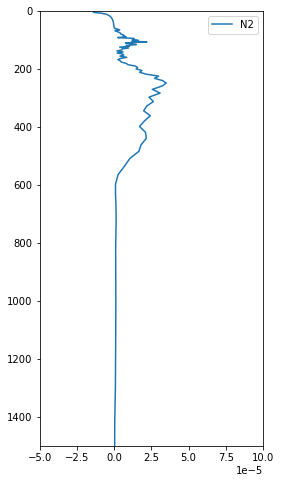

In [8]:
ylim = [1500,0]
fig, ax = plt.subplots(figsize=(4,8))
#ax.plot(N2o[:], depthi[1:-1],  label="N2o")
ax.plot(N2[1:-1], depthi[1:-1],  label="N2")
#ax.plot(N2gg[1:-1], depthi[1:-1],  label="N2gi")
#ax.plot(N2gi2[1:-1], depthi[1:-1],  label="N2gi2")
ax.set_xlim([-5e-5,1e-4])
ax.set_ylim(ylim)
ax.legend()

In [85]:
N2gg

<xarray.DataArray 'N2' (depthi: 113)>
array([ 9.969210e+36, -2.048274e-07, -9.535800e-08, -1.256840e-07,
       -2.210041e-07, -2.643071e-07, -2.599436e-07, -2.685769e-07,
       -2.728767e-07, -2.771756e-07, -2.901342e-07, -2.987600e-07,
       -3.073838e-07, -3.289923e-07, -3.982078e-07, -4.847194e-07,
       -6.534328e-07, -9.259579e-07, -1.254676e-06, -1.198314e-06,
       -6.043174e-06, -1.076745e-05, -4.944796e-06, -8.098618e-06,
       -1.647178e-05, -2.056122e-05, -2.576320e-05, -4.802729e-05,
       -3.585414e-05, -3.652168e-05, -5.317486e-05, -5.163751e-05,
       -3.960719e-05, -2.268667e-05, -9.433215e-06, -2.945701e-06,
       -9.832681e-07, -1.992454e-06, -6.899391e-06, -9.509869e-06,
       -1.006307e-05, -1.072524e-05, -9.285746e-06, -1.124350e-05,
       -8.587206e-06, -6.927452e-06, -6.737290e-06, -6.021052e-06,
       -6.073252e-06, -4.773475e-06, -4.021207e-06, -4.366952e-06,
       -3.237473e-06, -2.724857e-06, -3.200073e-06, -2.079411e-06,
       -2.250249e-06, -4.972781e-06, -6.328944e-06, -8.557138e-06,
       -8.585317e-06, -7.977786e-06, -8.799871e-06, -1.003848e-05,
       -1.140104e-05, -1.112645e-05, -9.719744e-06, -1.027261e-05,
       -9.440585e-06, -6.831493e-06, -9.107545e-06, -9.144422e-06,
       -6.227953e-06, -7.709327e-06, -6.863579e-06, -6.093504e-06,
       -5.390481e-06, -5.908356e-06, -5.096512e-06, -2.092010e-06,
       -4.123421e-06, -4.528727e-06, -1.880465e-06, -2.287235e-07,
       -1.891134e-08,  3.114905e-08,  2.078534e-07,  4.407720e-07,
        5.011946e-07,  4.775313e-07,  4.551358e-07,  4.939464e-07,
        5.070131e-07,  5.153731e-07,  4.898753e-07,  4.360544e-07,
        3.708383e-07,  1.485180e-07,  2.908389e-08,  3.181653e-09,
       -3.673806e-09, -2.375496e-08, -1.081953e-07, -1.956253e-07,
       -3.553336e-07, -4.841694e-07, -3.941559e-07, -4.794236e-07,
       -1.917530e-07, -1.721340e-08,  1.066525e-09, -2.850780e-04,
        9.969210e+36], dtype=float32)
Coordinates:
  * depthi   (depthi) float32 0.0 5.0 8.0 11.0 ... 4.731e+03 5.22e+03 5.76e+03

In [10]:
path_data    = '/work/mh0033/u241317/smt/N2/pp_calc_N2_period_2010-03-17T11:00:00.nc'
dN = xr.open_dataset(path_data)


In [23]:
dN

<xarray.Dataset>
Dimensions:  (cc: 59799625, depthi: 113)
Coordinates:
  * depthi   (depthi) float32 0.0 5.0 8.0 11.0 ... 4.731e+03 5.22e+03 5.76e+03
Dimensions without coordinates: cc
Data variables:
    N2       (depthi, cc) float32 ...

In [66]:
N2gg

<xarray.DataArray 'N2' (depthi: 113)>
array([ 9.969210e+36, -2.048274e-07, -9.535800e-08, -1.256840e-07,
       -2.210041e-07, -2.643071e-07, -2.599436e-07, -2.685769e-07,
       -2.728767e-07, -2.771756e-07, -2.901342e-07, -2.987600e-07,
       -3.073838e-07, -3.289923e-07, -3.982078e-07, -4.847194e-07,
       -6.534328e-07, -9.259579e-07, -1.254676e-06, -1.198314e-06,
       -6.043174e-06, -1.076745e-05, -4.944796e-06, -8.098618e-06,
       -1.647178e-05, -2.056122e-05, -2.576320e-05, -4.802729e-05,
       -3.585414e-05, -3.652168e-05, -5.317486e-05, -5.163751e-05,
       -3.960719e-05, -2.268667e-05, -9.433215e-06, -2.945701e-06,
       -9.832681e-07, -1.992454e-06, -6.899391e-06, -9.509869e-06,
       -1.006307e-05, -1.072524e-05, -9.285746e-06, -1.124350e-05,
       -8.587206e-06, -6.927452e-06, -6.737290e-06, -6.021052e-06,
       -6.073252e-06, -4.773475e-06, -4.021207e-06, -4.366952e-06,
       -3.237473e-06, -2.724857e-06, -3.200073e-06, -2.079411e-06,
       -2.250249e-06, -4.972781e-06, -6.328944e-06, -8.557138e-06,
       -8.585317e-06, -7.977786e-06, -8.799871e-06, -1.003848e-05,
       -1.140104e-05, -1.112645e-05, -9.719744e-06, -1.027261e-05,
       -9.440585e-06, -6.831493e-06, -9.107545e-06, -9.144422e-06,
       -6.227953e-06, -7.709327e-06, -6.863579e-06, -6.093504e-06,
       -5.390481e-06, -5.908356e-06, -5.096512e-06, -2.092010e-06,
       -4.123421e-06, -4.528727e-06, -1.880465e-06, -2.287235e-07,
       -1.891134e-08,  3.114905e-08,  2.078534e-07,  4.407720e-07,
        5.011946e-07,  4.775313e-07,  4.551358e-07,  4.939464e-07,
        5.070131e-07,  5.153731e-07,  4.898753e-07,  4.360544e-07,
        3.708383e-07,  1.485180e-07,  2.908389e-08,  3.181653e-09,
       -3.673806e-09, -2.375496e-08, -1.081953e-07, -1.956253e-07,
       -3.553336e-07, -4.841694e-07, -3.941559e-07, -4.794236e-07,
       -1.917530e-07, -1.721340e-08,  1.066525e-09, -2.850780e-04,
        9.969210e+36], dtype=float32)
Coordinates:
  * depthi   (depthi) float32 0.0 5.0 8.0 11.0 ... 4.731e+03 5.22e+03 5.76e+03

In [78]:
path_data    = '/work/mh0033/u241317/smt/results/pp_calc_T.nc'
dt = xr.open_dataset(path_data)
to = dt.T.data
path_data    = '/work/mh0033/u241317/smt/results/pp_calc_S.nc'
ds = xr.open_dataset(path_data)
so = ds.S.data

CT = gsw.CT_from_pt(so[:,:],to[:,:])
#rho = gsw.rho(SA,CT,p)
CT.shape
#print("calcN2")
N2g= gsw.stability.Nsquared(so,CT,depthc,lat=None)

MemoryError: Unable to allocate 25.0 GiB for an array with shape (112, 59799625) and data type float32